# HomeWork 05

<font size=1>
    Paolo Bonfini & Elias Kyritsis, 2024. All rights reserved.
</font>  

<div class="alert alert-block alert-warning" style="margin-top: 20px">

**Exercise 1:. Implement the Decision Tree (DT) algorithm by using the $\chi^2$-test as a splitting criterion**
<br><br>
    
You have to work on the provided code, which includes all the necessary functions for the definition and
the training of the Tree. The provided code reproduces the DT algorithm discussed in class,
and it uses the Gini cost function (as an alternative to e.g. Entropy or Information Gain) to evaluate
the "pureness" of the nodes.
<br><br>

<!-- In this exercise you will have to modify an implementation of the Decision Tree algorithm,
in order to include the "pruning" property. -->

**Task**: You will have to:

- **Ex 1.1**: Comment at least 4 parts of the code which are the most relevant to the DT algorithm. Describe what the DT algorithm actually does (_e.g. where and how the Tree is growing, how the decision function is applied etc._). Write your answers as comments on the corresponding parts of the provided code.<br><br>

- **Ex 1.2**: Copy in a new block, and edit the provided code in order to use $\chi^2$-test to split the nodes. Most of the code will be the same but in some parts you have to make the appropriate changes. You can test your code on the provided mock dataset, as it is shown in the example.<br><br>

- **Ex 1.3 [Bonus]**: Apply the tree pruning. Use the chi-square statistic to calculate the $p$-value at each node, and set a threshold $\alpha$ = 0.5 to decide where to "chop" the tree. **Notice that this Exercise 1.3 is a bonus task to improve your understanding. If you cannot solve it, you can ignore it without repercussions on your mark.**<br>

**Hints**
- For the Exercise 1.2: 
    - Use the [```scipy.stats.chi2_contingency```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) method in order to replace the gini splitting criterion with the $\chi^2$-test.
    - Notice that the `fit()` method calls itself: this is the trick that allows the tree to grow node by node.

# Ex. 1.1

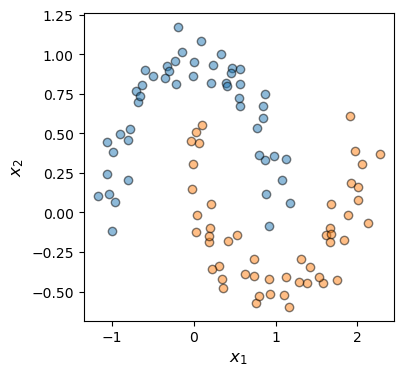

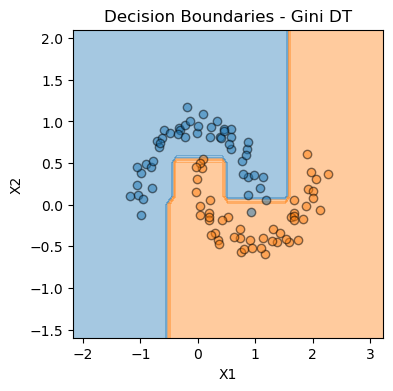

In [13]:
import numpy as np

#1.initialization tou komvou (node) me th parakatw klasi
class Node_gini:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini #gini tou komvou
        self.num_samples = num_samples # arithmos deigmatwn ston komvo
        self.num_samples_per_class = num_samples_per_class #arithmos deigmatwn pou anhkoun se kathe klasi
        self.predicted_class = predicted_class #h epikratesterh klasi anamesa sta deigmata tou komvou
        self.feature_index = 0 # o deiktis tou feature pou tha xrhsimopoihsoume gia to split twn datas
        self.threshold = 0 #o deiktis gia to threshold (katwfli/orio) tou feature pou xwrizei ta dedomena
        self.left = None #pointer tou deksiou ypo-komvou meta to split
        self.right = None #pointer tou aristerou ypo-komvou meta to split

class DecisionTree_gini():

    def __init__(self, max_depth=None):
        self.max_depth = max_depth #maximxum number of splits(epipeda) that the tree can grow
#dhladh level0=root komvos, level1=prwtoi ypokomvoi, level2=ypokomvoi tou prwtwn ypokomvwn, k.o.k.
#ara p.x. max depth = 2 shmainei to dentro tha exei "root node, child nodes, grandchildren"
    
#2.to fitting tou dentrou
    def fit(self, X, y, depth=0):
        classes = list(set(y)) #kanoume to y (tis klaseis) synolo wste na apofygoume ta diplotypa 
        #kathws h set() afairei osa stoixeia sth lista y epanalambanontai, & th ksanakanoume list
    
        num_samples_per_class = [np.sum(y == i) for i in classes] #lista me stoixeia posa samples per class
        predicted_class = classes[np.argmax(num_samples_per_class)] #class predicted:ayth me ta perissotera 
        #samples, ara briskw to deikti tou max num_samples_per_class kai dialegw thn antistoixi klasi
        
        node = Node_gini(
              gini=1 - sum((np.sum(y == c) / len(y)) ** 2 for c in classes),#ypologizw gini
              num_samples=len(y),
              num_samples_per_class=num_samples_per_class,
              predicted_class=predicted_class,
          ) #antikeimeno pou perilambanei oles tis parapanw plhrofories

        if depth < self.max_depth:
            idx, thr = self.best_split(X, y, classes) #edw briskoume to best feature & threshold me ta opoia tha kanoume split
            if idx is not None: #an den einai None:
                indices_left = X[:, idx] < thr #ftianoume enan boolean pinaka me stoixeia pou deixnoyn an ta antistoixa samples 
                #anhkoun ston aristero (True) ypokomvo tou dentrou, h ston deksi (False) 
                X_left, y_left = X[indices_left], y[indices_left] #ta data gia ton aristero ypokomvo 
                X_right, y_right = X[~indices_left], y[~indices_left] #ta data gia ton aristero ypokomvo
                node.feature_index = idx  # thetoume ton feature index pou xrhsimopoioume gia to split
                node.threshold = thr  # thetoume thn timi tou threshold pou xrhsimopoioume gia to split
                node.left = self.fit(X_left, y_left, depth + 1) #kanoume to fit gia ton aristero ypokomvo
                node.right = self.fit(X_right, y_right, depth + 1)  #kanoume to fit gia ton deksio ypokomvo


        self.node = node
        return self.node
    
    
    def best_split(self, X, y, classes):
        m, n = X.shape  # m=arithmos twn samples,n=arithmos twn features
        if m <= 1: #an exoume 1 sample de xreiazetai na kanoume split
            return None, None

        num_parent = [np.sum(y == c) for c in classes]  #posa samples exoume gia kathe klasi ston (parent) komvo
        best_gini = 1.0 - sum((num / m) ** 2 for num in num_parent)  #gini tou (parent) komvou
        best_idx, best_thr = None, None  #initial best feature & threshold 
    
        for idx in range(n):  # iteration gia kathe feature
            thresholds, classes_sorted = zip(*sorted(zip(X[:, idx], y)))  #taksinomw ta data ana feature
            num_left = [0] * len(classes)  #katanomi klasewn twn samples ston aristero ypo-komvo, arxika bazw 0 samples gia kathe klasi
            num_right = num_parent.copy()  #ksekiname na metrame tis klaseis exontas ola ta deigmata sto deksio ypokomvo

            for i in range(1, m):  #iteration sta sorted samples gia na brw to best split
                c = classes_sorted[i - 1]  #h klasi tou trexontos sample 
                num_left[classes.index(c)] += 1  #auksanw to plithos tis antistoixis class gia ton aristero komvo
                num_right[classes.index(c)] -= 1  #meiwnw to plithos tis antistoixis class gia ton deksio komvo

                # gini deksiou kai aristerou ypokomvou gia to best split
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(len(classes)))
                gini_right = 1.0 - sum((num_right[x] / (m - i)) ** 2 for x in range(len(classes)))
                gini = (i * gini_left + (m - i) * gini_right) / m  #oliko gini (aristera & deksia) gia to best split

                if thresholds[i] == thresholds[i - 1]:  #an to threshold einai to idio me tis prohgoumenhs epanalhpshs skiparoume ta parakatw  
                    continue                             #kai pame sto epomeno sample (epomenh epanalhpsh)

                if gini < best_gini:  #an to (oliko) gini tis trexousas epanalhpsis einai mikrotero apo to best gini
                    # pou brikame prin tote best gini = gini giati ekei tha exoume kalytero split
                    best_gini = gini
                    best_idx = idx  #antistoixa ananewnoume kai to deikti tou feature
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2  #m.o. tou prohgoumenou kai tou trexontos threshold : to threshold gia best split

        return best_idx, best_thr  # return the best feature and threshold gia na kanoume split 

        
    def predict(self, X):
        yhat = []
        for sample in X: 
            node = self.node
            while node.left:
                if sample[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            yhat.append(node.predicted_class)
        return np.array(yhat)


##testing wt mock data
from sklearn.datasets import make_moons, make_classification

X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
# OR:
# X, y = make_classification(n_samples=1000, n_classes=3, n_features=2,
#            n_informative=2, n_redundant=0, n_clusters_per_class=1,
#            class_sep=1.5, shift=0, scale=1.0, random_state=42)

colors = {0: 'C0', 1: 'C1', 2: 'C2'}
# colors dictionary indexed by class label

from matplotlib import pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c=colors[2], marker='o', edgecolors='k', alpha=0.5)
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12)
plt.show()



def plot_decision_boundaries(clf, X, y, label=''):
    # Generate a grid of points to make predictions:
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

    # Use the classifier to make predictions on the grid:
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    '''Here is where the magic happens! Above we have created the (x1, x2) grid,
    and now we calculate the class for each and every point.'''

    Z = Z.reshape(xx1.shape)

    colors = {0: 'C0', 1: 'C1', 2: 'C2'}
    # colors dictionary indexed by class label

    # Create a contour plot to display the decision boundaries:
    fig = plt.figure(figsize=(4, 4))

    from matplotlib.colors import ListedColormap
    n_classes = len(np.unique(y))
    custom_cmap = ListedColormap(list(colors.values())[:n_classes])

    plt.contourf(xx1, xx2, Z, cmap=custom_cmap, alpha=0.4)

    plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
    plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
    plt.scatter(X[y==2,0], X[y==2,1], c=colors[2], marker='o', edgecolors='k', alpha=0.5)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundaries - '+label+' DT')
    plt.show()



clf_gini = DecisionTree_gini(max_depth=5)
clf_gini.fit(X, y)

plot_decision_boundaries(clf_gini, X, y, label='Gini')

# Ex. 1.2

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

class Node_chi2:
    def __init__(self, chi2, num_samples, num_samples_per_class, predicted_class):
        self.chi2 = chi2
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class DecisionTree_gini():
    
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        
    def fit(self, X, y, depth=0):
        classes = list(set(y))
        num_samples_per_class = [np.sum(y == i) for i in classes]
        predicted_class = classes[np.argmax(num_samples_per_class)]
        node = Node_chi2( chi2=0,
              num_samples=len(y),
              num_samples_per_class=num_samples_per_class,
              predicted_class=predicted_class,
          )

        if depth < self.max_depth:
            idx, thr = self.best_split(X, y, classes)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self.fit(X_left, y_left, depth + 1)
                node.right = self.fit(X_right, y_right, depth + 1)

        self.node = node
        return self.node
    
    
    def best_split(self, X, y, classes):
        m, n = X.shape
        if m <= 1:
            return None, None
        
        num_parent = [np.sum(y == c) for c in classes]
        best_chi2 = 0
        best_idx, best_thr = None, None
        
        for idx in range(n):
            thresholds, classes_sorted = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * len(classes)
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes_sorted[i - 1]
                num_left[classes.index(c)] += 1
                num_right[classes.index(c)] -= 1
                chi2_left = [num_left[x] for x in range(len(classes))]
                chi2_right = [num_right[x] for x in range(len(classes))]
                
                if 0 in chi2_left or 0 in chi2_right:
                    continue
               
                pinakas_chi2 = np.array([chi2_left,chi2_right]).T

                #kanoume to chi square test
                chi2_stat, p_value, dof, expected = chi2_contingency(pinakas_chi2)
                
                if p_value < 0.05:  
                    chi2_stat = chi2_stat
                else:
                    chi2_stat = 0  #ousiastika etsi kanoume reject osa den exoun p_value<0.05
                if chi2_stat > best_chi2:  
                    best_chi2 = chi2_stat
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
                    
        return best_idx, best_thr        
        
    def predict(self, X):
        yhat = []
        for sample in X: 
            node = self.node
            while node.left:
                if sample[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            yhat.append(node.predicted_class)
        return np.array(yhat)

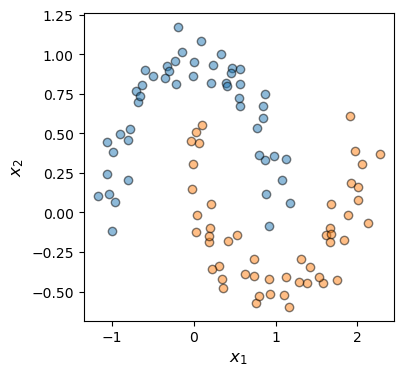

In [2]:
from sklearn.datasets import make_moons, make_classification

X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
# OR:
# X, y = make_classification(n_samples=1000, n_classes=3, n_features=2,
#            n_informative=2, n_redundant=0, n_clusters_per_class=1,
#            class_sep=1.5, shift=0, scale=1.0, random_state=42)

colors = {0: 'C0', 1: 'C1', 2: 'C2'}
# colors dictionary indexed by class label

from matplotlib import pyplot as plt
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c=colors[2], marker='o', edgecolors='k', alpha=0.5)
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12)
plt.show()

In [5]:
def plot_decision_boundaries(clf, X, y, label=''):
    # Generate a grid of points to make predictions:
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

    # Use the classifier to make predictions on the grid:
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    '''Here is where the magic happens! Above we have created the (x1, x2) grid,
    and now we calculate the class for each and every point.'''

    Z = Z.reshape(xx1.shape)

    colors = {0: 'C0', 1: 'C1', 2: 'C2'}
    # colors dictionary indexed by class label

    # Create a contour plot to display the decision boundaries:
    fig = plt.figure(figsize=(4, 4))

    from matplotlib.colors import ListedColormap
    n_classes = len(np.unique(y))
    custom_cmap = ListedColormap(list(colors.values())[:n_classes])

    plt.contourf(xx1, xx2, Z, cmap=custom_cmap, alpha=0.4)

    plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
    plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
    plt.scatter(X[y==2,0], X[y==2,1], c=colors[2], marker='o', edgecolors='k', alpha=0.5)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundaries - '+label+' DT')
    plt.show()

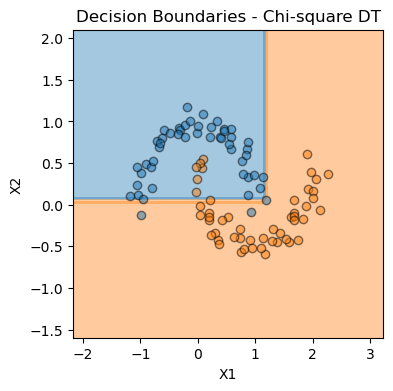

In [6]:
clf_chi2 = DecisionTree_gini(max_depth=5)
clf_chi2.fit(X, y)

plot_decision_boundaries(clf_gini, X, y, label='Chi-square')